In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.nonparametric.kernel_regression import KernelReg
from scipy.stats import shapiro

In [31]:
df = pd.read_csv("/content/dataset_fin.csv")

In [32]:
df.head(10)

,Unnamed: 0,Data,Preço
0,1,2020-01-01 0:00:00,100.000000
1,2,2020-01-02 0:00:00,100.546714
2,3,2020-01-03 0:00:00,100.457967
3,4,2020-01-06 0:00:00,101.158851
4,5,2020-01-07 0:00:00,102.750110
5,6,2020-01-08 0:00:00,102.560892
6,7,2020-01-09 0:00:00,102.372040
7,8,2020-01-10 0:00:00,104.039898
8,9,2020-01-13 0:00:00,104.890356
9,10,2020-01-14 0:00:00,104.450368


In [5]:
# @title Ajustando a Coluna Data

df['Data'] = pd.to_datetime(df['Data'])  # Converter a coluna de datas para datetime

In [33]:
df["Preço"].describe()

count    1043.000000
mean      130.729153
std        30.540798
min        90.858460
25%       110.427673
50%       126.555585
75%       135.135748
max       221.493534
Name: Preço, dtype: float64

Text(0, 0.5, 'Frequência')

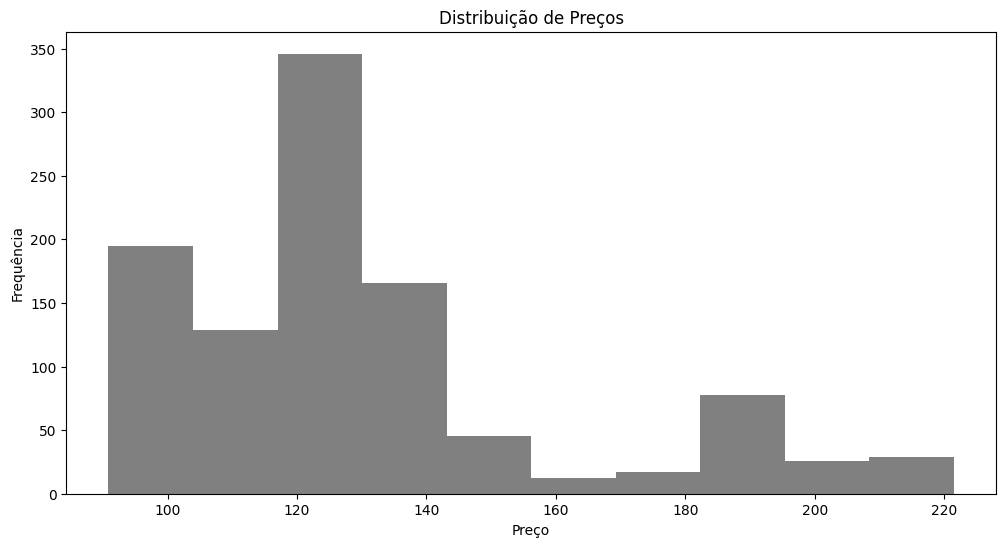

In [34]:
# @title Histograma

# Definir o tamanho da figura
plt.figure(figsize=(12, 6))

# plotar o gráfico com a coluna preço
plt.hist(df["Preço"], bins = 10, color="grey")
plt.title('Distribuição de Preços')
plt.xlabel('Preço')
plt.ylabel('Frequência')

In [36]:
# Aplicar o teste de normalidade na coluna "Preço"
stat, p_value = shapiro(df['Preço'])

print(f'Estatística do teste: {stat}')
print(f'Valor-p: {p_value}')

# Interpretação
alpha = 0.05
if p_value > alpha:
    print('A amostra parece vir de uma distribuição normal (não rejeita H0)')
else:
    print('A amostra não parece vir de uma distribuição normal (rejeita H0)')


Estatística do teste: 0.864379346370697
Valor-p: 4.4113590885794233e-29
A amostra não parece vir de uma distribuição normal (rejeita H0)


### Conclui-se que os dados não seguem uma distribuição normal, havendo a necessidade de utilizar métodos não paramétricos para análise estatística.

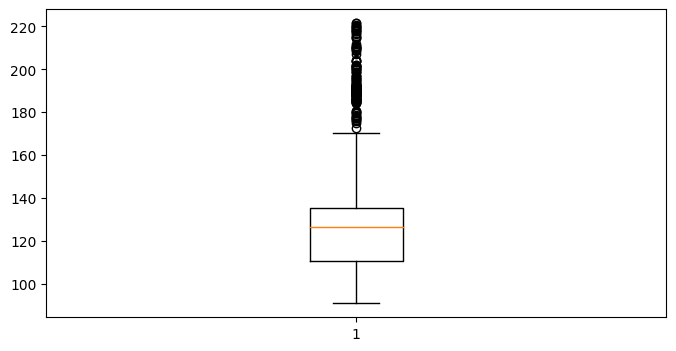

In [8]:
# @title Boxplot

# Definir o tamanho da figura
plt.figure(figsize=(8, 4))

# plotar o gráfico com a coluna preço
plt.boxplot(df["Preço"])
# Mostrar o gráfico
plt.show()


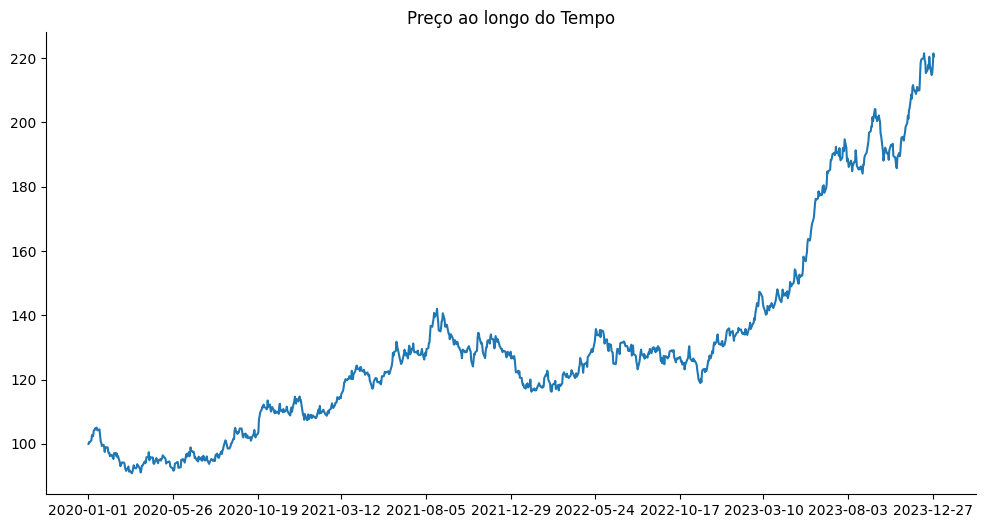

In [9]:
# @title Preço ao longo do tempo

# Definir o tamanho da figura
plt.figure(figsize=(12, 6))

# Plotar o gráfico com as colunas especificadas
plt.plot(df["Data"], df["Preço"])

# Titulo do grafico
plt.title('Preço ao longo do Tempo')

# Selecionar algumas datas para mostrar no eixo x
num_ticks = 10  # Número de valores de datas que você deseja exibir
ticks = df["Data"].iloc[::len(df)//num_ticks]  # Seleciona um valor de data a cada intervalo calculado
plt.xticks(ticks)  # Define os ticks do eixo x

# Remover as bordas superior e direita
plt.gca().spines[['top', 'right']].set_visible(False)

# Rotacionar as labels do eixo x para melhor visualização
#plt.xticks(rotation=45)

# Mostrar o gráfico
plt.show()


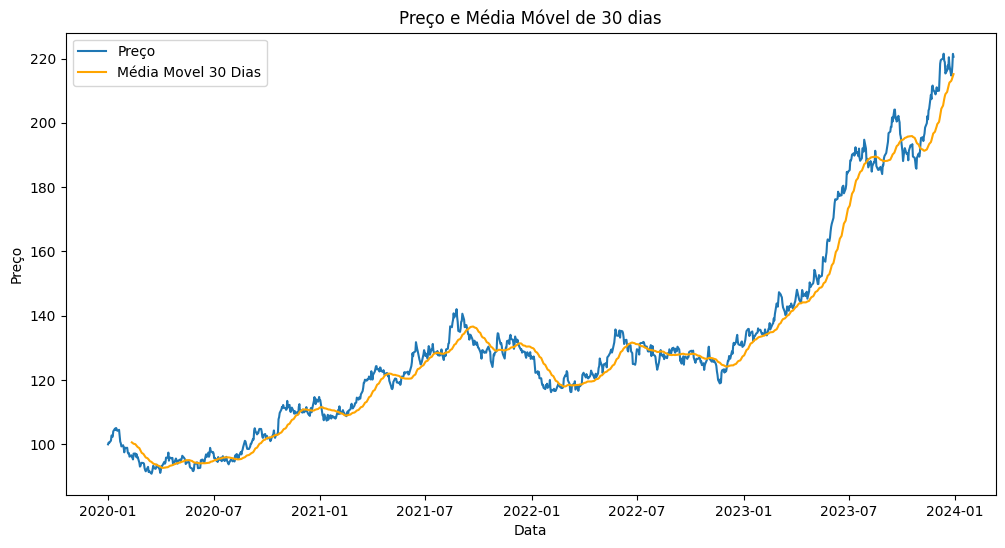

In [10]:
# @title Média Movel

df["Média Movel 30 Dias"] = df["Preço"].rolling(window = 30).mean()
plt.figure(figsize=(12, 6))
plt.plot(df["Data"], df["Preço"], label='Preço')
plt.plot(df["Data"], df['Média Movel 30 Dias'], label='Média Movel 30 Dias', color='orange')
plt.title('Preço e Média Móvel de 30 dias')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()

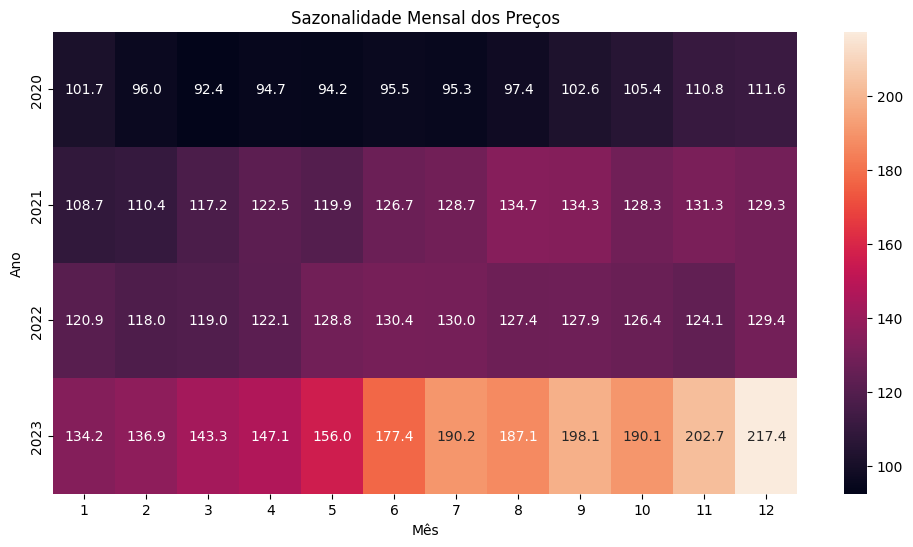

In [22]:
# @title Analise de Sazonalidade

# Agrupar por ano e mês para encontrar padrões sazonais
df['Ano'] = df['Data'].dt.year
df['Mês'] = df['Data'].dt.month

# Analisando a sazonalidade
sazonalidade = df.groupby(['Ano', 'Mês'])['Preço'].mean().unstack()

plt.figure(figsize=(12, 6))
#sns.color_palette("rocket_r", as_cmap=True)
sns.color_palette("flare", as_cmap=True)
sns.heatmap(sazonalidade, annot=True, fmt=".1f")
plt.title('Sazonalidade Mensal dos Preços')
plt.xlabel('Mês')
plt.ylabel('Ano')
plt.show()


##Conclusões Gerais

**Tendência de Aumento:** Há uma tendência geral de aumento dos preços ao longo do período analisado.

**Variabilidade:** Os preços apresentam uma variabilidade significativa, com alguns outliers que podem indicar eventos extraordinários ou mudanças significativas no mercado.

**Padrões Sazonais**: Certos meses, como dezembro e julho, apresentam preços mais altos de forma consistente ao longo dos anos, indicando padrões sazonais. Isso pode ser devido a fatores como aumento da demanda nesses meses (por exemplo, compras de fim de ano em dezembro).

**Aumento ao Longo do Tempo:** Além da sazonalidade, há um aumento geral dos preços ao longo dos anos, o que pode ser resultado de inflação, mudanças econômicas, ou outros fatores de mercado.

**Regressões:** Utilizar tecnicas de regressão que sejam compativeis com dados não paramétricos, uma vez que HO foi rejeitado.  